In [320]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

In [6]:
link = 'https://api.opendota.com/api/heroes'
r = requests.get(link)
data = json.loads(r.text)
data

[{'id': 1,
  'name': 'npc_dota_hero_antimage',
  'localized_name': 'Anti-Mage',
  'primary_attr': 'agi',
  'attack_type': 'Melee',
  'roles': ['Carry', 'Escape', 'Nuker'],
  'legs': 2},
 {'id': 2,
  'name': 'npc_dota_hero_axe',
  'localized_name': 'Axe',
  'primary_attr': 'str',
  'attack_type': 'Melee',
  'roles': ['Initiator', 'Durable', 'Disabler', 'Jungler', 'Carry'],
  'legs': 2},
 {'id': 3,
  'name': 'npc_dota_hero_bane',
  'localized_name': 'Bane',
  'primary_attr': 'int',
  'attack_type': 'Ranged',
  'roles': ['Support', 'Disabler', 'Nuker', 'Durable'],
  'legs': 4},
 {'id': 4,
  'name': 'npc_dota_hero_bloodseeker',
  'localized_name': 'Bloodseeker',
  'primary_attr': 'agi',
  'attack_type': 'Melee',
  'roles': ['Carry', 'Disabler', 'Jungler', 'Nuker', 'Initiator'],
  'legs': 2},
 {'id': 5,
  'name': 'npc_dota_hero_crystal_maiden',
  'localized_name': 'Crystal Maiden',
  'primary_attr': 'int',
  'attack_type': 'Ranged',
  'roles': ['Support', 'Disabler', 'Nuker', 'Jungler'],
  

# Easy


Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и посчитайте количество героев для каждого значения legs

In [63]:
heroes = pd.DataFrame(data)
heroes

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler, Carry]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
...,...,...,...,...,...,...,...
118,128,npc_dota_hero_snapfire,Snapfire,str,Ranged,"[Support, Nuker, Disabler, Escape]",2
119,129,npc_dota_hero_mars,Mars,str,Melee,"[Carry, Initiator, Disabler, Durable]",2
120,135,npc_dota_hero_dawnbreaker,Dawnbreaker,str,Melee,"[Carry, Durable]",2
121,136,npc_dota_hero_marci,Marci,str,Melee,"[Support, Carry, Initiator, Disabler, Escape]",2


In [59]:
for name, group in heroes.groupby(["legs"]):
    print(name, '\n')
    print(group, '\n')
    

0 

      id                              name      localized_name primary_attr  \
9     10           npc_dota_hero_morphling           Morphling          agi   
10    11           npc_dota_hero_nevermore        Shadow Fiend          agi   
14    15               npc_dota_hero_razor               Razor          agi   
26    28             npc_dota_hero_slardar             Slardar          str   
31    33              npc_dota_hero_enigma              Enigma          int   
38    40          npc_dota_hero_venomancer          Venomancer          agi   
45    47               npc_dota_hero_viper               Viper          agi   
65    67             npc_dota_hero_spectre             Spectre          agi   
66    68  npc_dota_hero_ancient_apparition  Ancient Apparition          int   
87    89          npc_dota_hero_naga_siren          Naga Siren          agi   
89    91                npc_dota_hero_wisp                  Io          str   
92    94              npc_dota_hero_medusa      

In [56]:
count_heroes_by_legs = heroes.groupby("legs", group_keys=True)['id'].count()
count_heroes_by_legs

legs
0    14
2    97
4     8
6     3
8     1
Name: id, dtype: int64

# Normal

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик. Выведите список героев с этим набором характеристик

In [101]:
#heroes_group_count = heroes.groupby(["attack_type","primary_attr"])['id'].count()

heroes_group_count = heroes.groupby(["attack_type","primary_attr"]).agg({'id':['count']})
heroes_group_count

id
                         count
attack_type primary_attr      
Melee       agi             19
            int              3
            str             38
Ranged      agi             19
            int             40
            str              4

In [103]:
max_set_characteristics = heroes.groupby(["attack_type","primary_attr"])['id'].count().max()
max_set_characteristics


40

In [116]:
max_set = heroes_group_count.loc[heroes_group_count['id']['count'] == max_set_characteristics]
max_set


,,id
,,count
attack_type,primary_attr,
Ranged,int,40


In [169]:
List = max_set.index.values
List


array([('Ranged', 'int')], dtype=object)

In [179]:
characteristics_by_max_legs = heroes[(heroes['attack_type'] == max_set.index.values[0][0]) & (heroes['primary_attr'] == max_set.index.values[0][1])]
characteristics_by_max_legs

,id,name,localized_name,primary_attr,attack_type,roles,legs
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
12,13,npc_dota_hero_puck,Puck,int,Ranged,"[Initiator, Disabler, Escape, Nuker]",2
16,17,npc_dota_hero_storm_spirit,Storm Spirit,int,Ranged,"[Carry, Escape, Nuker, Initiator, Disabler]",2
20,21,npc_dota_hero_windrunner,Windranger,int,Ranged,"[Carry, Support, Disabler, Escape, Nuker]",2
21,22,npc_dota_hero_zuus,Zeus,int,Ranged,"[Nuker, Carry]",2
23,25,npc_dota_hero_lina,Lina,int,Ranged,"[Support, Carry, Nuker, Disabler]",2
24,26,npc_dota_hero_lion,Lion,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
25,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2
28,30,npc_dota_hero_witch_doctor,Witch Doctor,int,Ranged,"[Support, Nuker, Disabler]",2


# Hard

В колонке roles находится список того, к каким ролям приписывают создатели Dota того или иного героя. Так же у каждого героя есть его основная характеристика, которая записана в колонке primary_attr.

1. Для каждой роли требуется построить bar plot на котором будет видно какое колличество раз героев с тем или иным основным атрибутам создатели игры относят к данной роли.


P.s Для задания 1 должно получится 12 таких графиков (для каждой роли):

In [204]:
heroes_explode_roles =  heroes.explode('roles')
heroes_explode_roles

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Carry,2
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Escape,2
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Nuker,2
1,2,npc_dota_hero_axe,Axe,str,Melee,Initiator,2
1,2,npc_dota_hero_axe,Axe,str,Melee,Durable,2
...,...,...,...,...,...,...,...
121,136,npc_dota_hero_marci,Marci,str,Melee,Disabler,2
121,136,npc_dota_hero_marci,Marci,str,Melee,Escape,2
122,137,npc_dota_hero_primal_beast,Primal Beast,str,Melee,Initiator,2
122,137,npc_dota_hero_primal_beast,Primal Beast,str,Melee,Durable,2


In [221]:
qqq = heroes_explode_roles.groupby(['roles', 'primary_attr' ]).count().id
qqq

roles      primary_attr
Carry      agi             33
           int             14
           str             23
Disabler   agi             21
           int             36
           str             34
Durable    agi             10
           int              5
           str             34
Escape     agi             24
           int             12
           str             15
Initiator  agi             11
           int             12
           str             32
Jungler    agi              3
           int              8
           str              4
Nuker      agi             22
           int             37
           str             28
Pusher     agi             13
           int             12
           str              4
Support    agi              5
           int             27
           str             14
Name: id, dtype: int64

Carry 
 primary_attr
agi    33
int    14
str    23
Name: id, dtype: int64


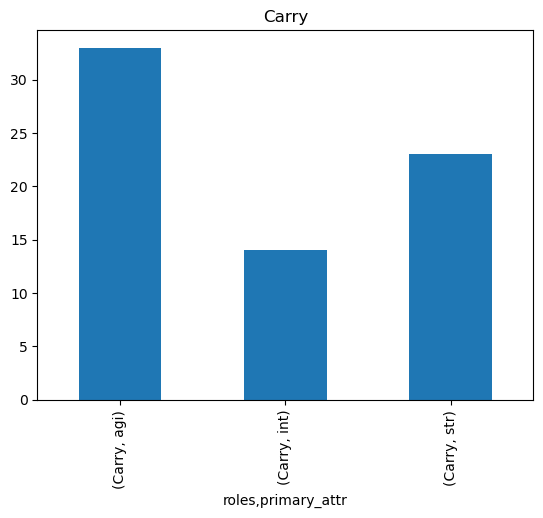

Disabler 
 primary_attr
agi    21
int    36
str    34
Name: id, dtype: int64


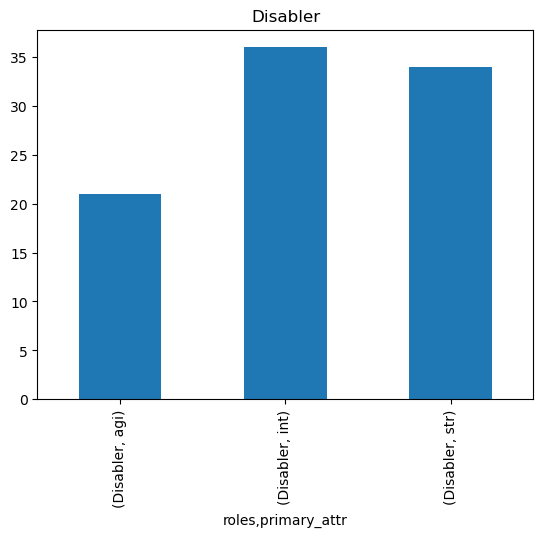

Durable 
 primary_attr
agi    10
int     5
str    34
Name: id, dtype: int64


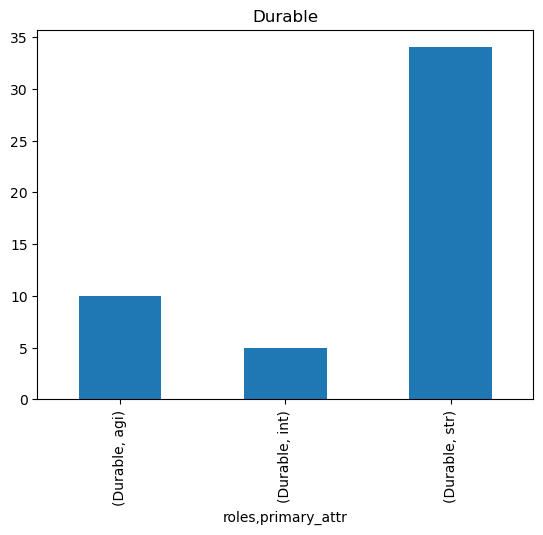

Escape 
 primary_attr
agi    24
int    12
str    15
Name: id, dtype: int64


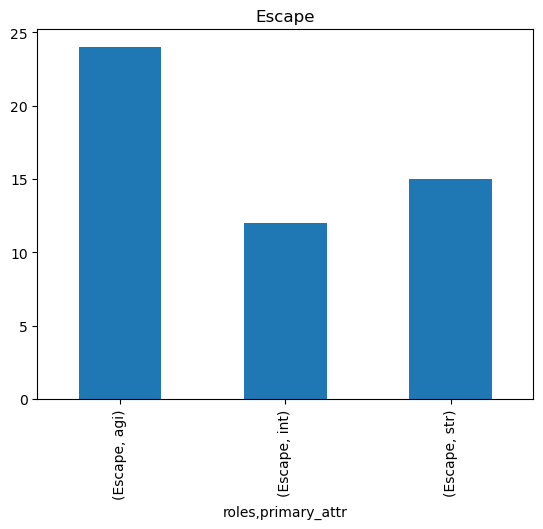

Initiator 
 primary_attr
agi    11
int    12
str    32
Name: id, dtype: int64


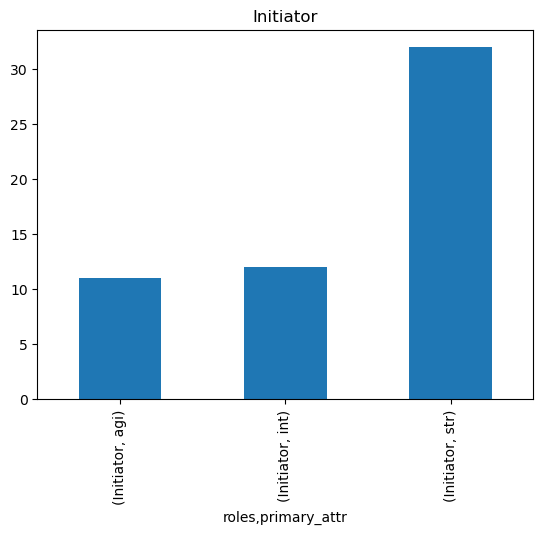

Jungler 
 primary_attr
agi    3
int    8
str    4
Name: id, dtype: int64


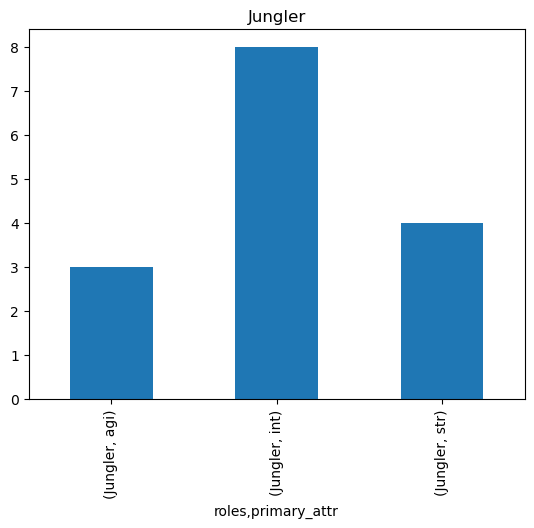

Nuker 
 primary_attr
agi    22
int    37
str    28
Name: id, dtype: int64


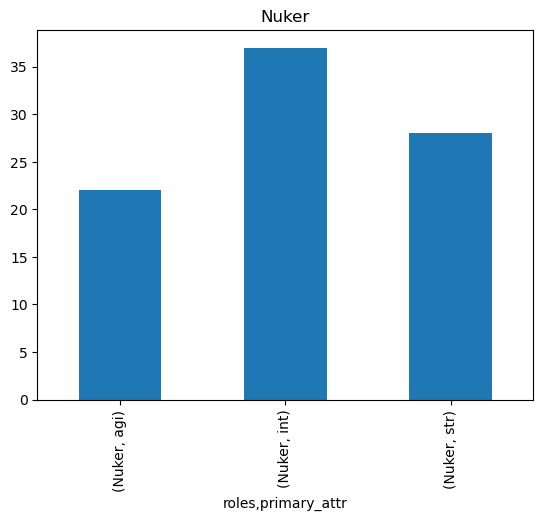

Pusher 
 primary_attr
agi    13
int    12
str     4
Name: id, dtype: int64


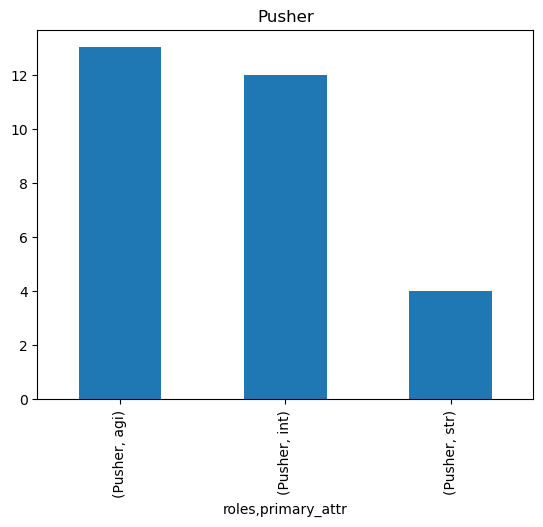

Support 
 primary_attr
agi     5
int    27
str    14
Name: id, dtype: int64


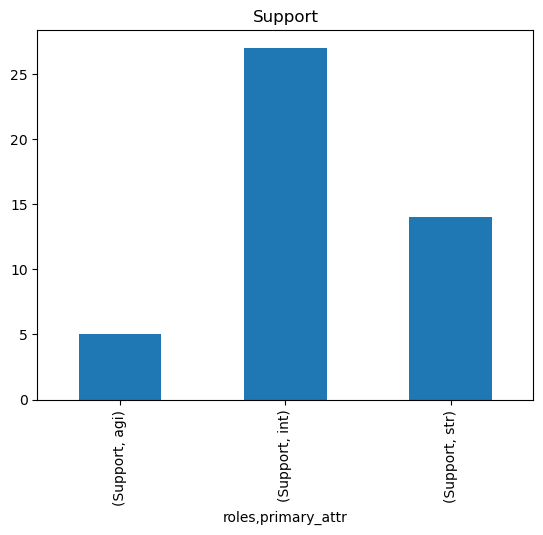

In [308]:
for name,group in  qqq.groupby(['roles' ]):
    print(name, '\n', group[name])
    pl_roles = group.plot.bar(x = 'primary_attr', y = 'count')
    pylab.title (name)
    plt.show()
    

2. Так же требуется сделать обратный график: для каждого основного аттрибута сделайте bar plot на котором будет видно какое колличество раз создатели Dota относили героя с этим атрибутом к конкретной роли.



In [287]:
qqq2 = heroes_explode_roles.groupby([ 'primary_attr','roles' ]).count().id
qqq2

primary_attr  roles    
agi           Carry        33
              Disabler     21
              Durable      10
              Escape       24
              Initiator    11
              Jungler       3
              Nuker        22
              Pusher       13
              Support       5
int           Carry        14
              Disabler     36
              Durable       5
              Escape       12
              Initiator    12
              Jungler       8
              Nuker        37
              Pusher       12
              Support      27
str           Carry        23
              Disabler     34
              Durable      34
              Escape       15
              Initiator    32
              Jungler       4
              Nuker        28
              Pusher        4
              Support      14
Name: id, dtype: int64

agi 
 roles
Carry        33
Disabler     21
Durable      10
Escape       24
Initiator    11
Jungler       3
Nuker        22
Pusher       13
Support       5
Name: id, dtype: int64


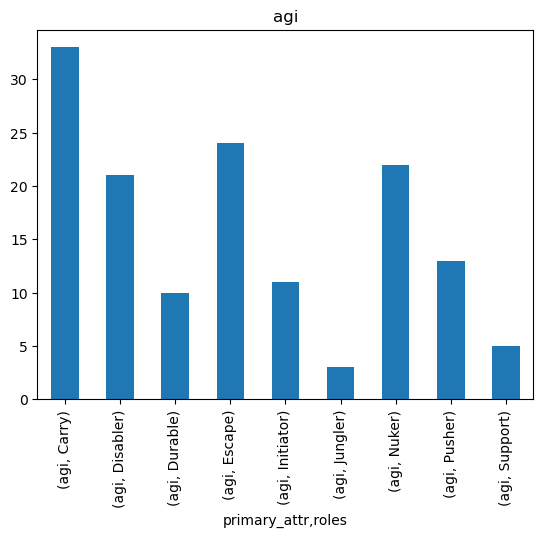

int 
 roles
Carry        14
Disabler     36
Durable       5
Escape       12
Initiator    12
Jungler       8
Nuker        37
Pusher       12
Support      27
Name: id, dtype: int64


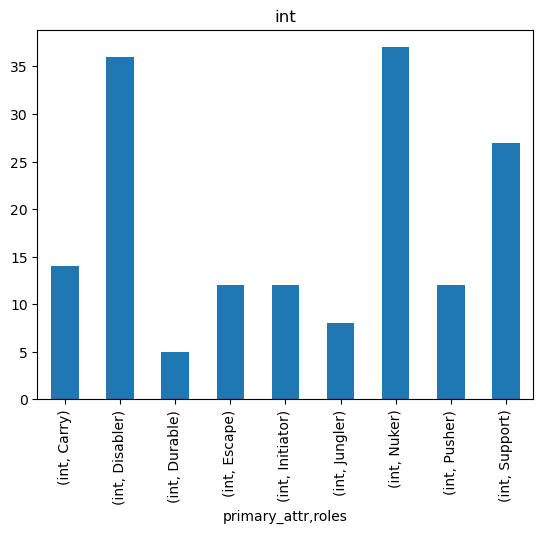

str 
 roles
Carry        23
Disabler     34
Durable      34
Escape       15
Initiator    32
Jungler       4
Nuker        28
Pusher        4
Support      14
Name: id, dtype: int64


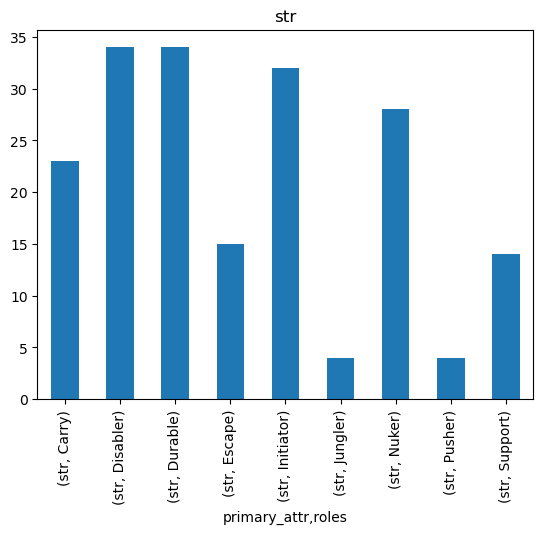

In [307]:

for name,group in  qqq2.groupby(['primary_attr' ]):
    print(name, '\n', group[name])
    pl_roles = group.plot.bar(x = 'roles', y = 'count')
    pylab.title (name)
    plt.show()

3. Сделайте выводы по полученым графикам (это могут быть совершенно любые выводы)

1) Судя по графикам наименьшее число героев с ролью Jungler, либо герои с этой ролью наименее используемые, либо являются экслюзивными
2) 